<a href="https://colab.research.google.com/github/randerson112358/Python/blob/master/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Houses](https://cdn12.picryl.com/photo/2016/12/31/painted-ladies-houses-san-francisco-architecture-buildings-2efc18-1024.jpg)
# House Median Price Prediction
### Using Deep Neural Networks

### Program Description
This program predicts if the price of a house will be above the median price or not based off of it's features.

### About Neural Networks
Artificial neural networks (ANN) or connectionist systems are computing systems that are inspired by, but not necessarily identical to, the biological neural networks that constitute animal brains. Such systems "learn" to perform tasks by considering examples, generally without being programmed with any task-specific rules. Deep Neural networs are just ANN's with multiple hidden layers.

In [2]:
#import the dependencies
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




Using TensorFlow backend.


In [0]:
#Load the data set
df = pd.read_csv('housepricedata.csv')


In [4]:
#Look at the data first 7 rows of data
df.head(7)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1


In [5]:
#Convert the data into an array
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [0]:
#Split the data set
X = dataset[:,0:10]
Y = dataset[:,10]

In [8]:
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 1 inclusive
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
#Split the data into 80% training and 20% (testing (10%) and validation (10%))
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

#the training set has 1022 data points while the validation and test set has 219 data points each. The X variables have 10 input features, while the Y variables only has one feature to predict.
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [0]:
#Build the model and architecture of the deep neural network
from keras.models import Sequential
from keras.layers import Dense

# The models architechture 4 layers, 3 with 32 neurons and activation function = relu function, 
# the last layer has 1 neuron with an activation function = sigmoid function which returns a value btwn 0 and 1
# The input shape/ input_dim = 10 the number of features in the data set
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [0]:
# loss measuers how well the model did on training , and then tries to improve on it using the optimizer
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [83]:
#Train the model
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.6923 - acc: 0.5323 - val_loss: 0.6939 - val_acc: 0.4932
Epoch 2/100
1022/1022 [==============================] - 0s 67us/step - loss: 0.6887 - acc: 0.5499 - val_loss: 0.6908 - val_acc: 0.5114
Epoch 3/100
1022/1022 [==============================] - 0s 53us/step - loss: 0.6850 - acc: 0.5881 - val_loss: 0.6877 - val_acc: 0.5525
Epoch 4/100
1022/1022 [==============================] - 0s 58us/step - loss: 0.6818 - acc: 0.6018 - val_loss: 0.6851 - val_acc: 0.5708
Epoch 5/100
1022/1022 [==============================] - 0s 55us/step - loss: 0.6790 - acc: 0.6341 - val_loss: 0.6828 - val_acc: 0.5753
Epoch 6/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.6762 - acc: 0.6301 - val_loss: 0.6803 - val_acc: 0.6119
Epoch 7/100
1022/1022 [==============================] - 0s 53us/step - loss: 0.6735 - acc: 0.6614 - val_loss: 0.6779 - val_acc: 0.6256
Ep

In [84]:
#The reason why we have the index 1 after the model.evaluate function is because
#the function returns the loss as the first element and the accuracy as the 
#second element. To only output the accuracy, simply access the second element 
#(which is indexed by 1, since the first element starts its indexing from 0).
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 80us/step


0.8538812755449722

In [88]:
#Make a prediction
prediction = model.predict(X_test)
prediction  = [1 if y>=0.85 else 0 for y in prediction] #Threshold
print(prediction)
print(Y_test)

[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0

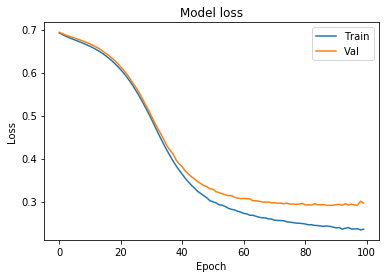

In [86]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


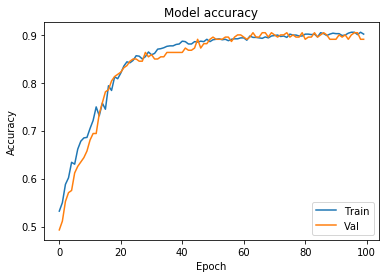

In [87]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()